In [55]:
import pandas as pd
import numpy as np
import wrangle_zillow
import acquire
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.shape

(77580, 69)

In [4]:
df['parcelid'].nunique()

77381

In [5]:
# Dropping duplicate parcelid's and storing in to a new dataframe
df1 = df.sort_values(by='transactiondate', ascending=True).drop_duplicates(subset='parcelid',keep='last')

In [6]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77579
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   heatingorsystemtypeid         49440 non-null  float64
 3   buildingclasstypeid           15 non-null     float64
 4   architecturalstyletypeid      206 non-null    float64
 5   airconditioningtypeid         24953 non-null  float64
 6   propertylandusetypeid         77381 non-null  float64
 7   parcelid                      77381 non-null  int64  
 8   id                            77381 non-null  int64  
 9   basementsqft                  50 non-null     float64
 10  bathroomcnt                   77381 non-null  float64
 11  bedroomcnt                    77381 non-null  float64
 12  buildingqualitytypeid         49672 non-null  float64
 13  c

In [7]:
df1.shape

(77381, 69)

In [8]:
df1.nunique()

typeconstructiontypeid       4
storytypeid                  1
heatingorsystemtypeid       10
buildingclasstypeid          2
architecturalstyletypeid     5
                            ..
architecturalstyledesc       5
buildingclassdesc            2
heatingorsystemdesc         10
storydesc                    1
typeconstructiondesc         4
Length: 69, dtype: int64

In [9]:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    prcnt_miss = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing': prcnt_miss})
    return cols_missing

def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'percent_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'percent_cols_missing']).count()\
    .rename(index=str, columns={'index': 'num_rows'}).reset_index()
    return rows_missing

In [10]:
nulls_by_col(df1)

num_rows_missing  percent_rows_missing
typeconstructiontypeid               77159             99.713108
storytypeid                          77331             99.935385
heatingorsystemtypeid                27941             36.108347
buildingclasstypeid                  77366             99.980615
architecturalstyletypeid             77175             99.733785
...                                    ...                   ...
architecturalstyledesc               77175             99.733785
buildingclassdesc                    77366             99.980615
heatingorsystemdesc                  27941             36.108347
storydesc                            77331             99.935385
typeconstructiondesc                 77159             99.713108

[69 rows x 2 columns]

In [11]:
nulls_by_row(df1)

num_cols_missing percent_cols_missing  num_rows
0                23    33.33333333333333         2
1                24    34.78260869565217        13
2                25   36.231884057971016        24
3                26    37.68115942028986        65
4                27   39.130434782608695       316
5                28    40.57971014492754       455
6                29   42.028985507246375      5270
7                30    43.47826086956522      3455
8                31   44.927536231884055      9891
9                32     46.3768115942029     12579
10               33    47.82608695652174     14782
11               34   49.275362318840585     13327
12               35    50.72463768115942      5148
13               36    52.17391304347826      5775
14               37    53.62318840579711      3620
15               38   55.072463768115945      1925
16               39    56.52173913043478       285
17               40   57.971014492753625       230
18               41    59.42028985507246        29
19               42    60.86956521739131        23
20               43    62.31884057971014        28
21               44    63.76811594202898        78
22               45    65.21739130434783        50
23               46    66.66666666666666         5
24               47    68.11594202898551         3
25               48    69.56521739130434         3

In [12]:
def summarize(df):
    '''
    This function will take in a single argument (pandas DF)
    and output to console various statistics on said DF, including:
    # .head()
    # .info()
    # .describe()
    # value_counts()
    # observe null values
    '''
    print('----------------------------------------------------')
    print('DataFrame Head')
    print(df.head(3))
    print('----------------------------------------------------')
    print('DataFrame Info')
    print(df.info())
    print('----------------------------------------------------')
    print('DataFrame Description')
    print(df.describe())
    num_cols = df.select_dtypes(exclude='O').columns.to_list()
    cat_cols = df.select_dtypes(include='O').columns.to_list()
    print('----------------------------------------------------')
    print('DataFrame Value Counts: ')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort=False))
    print('----------------------------------------------------')
    print('Nulls in DataFrame by Column: ')
    print(nulls_by_col(df))
    print('----------------------------------------------------')
    print('Nulls in DataFrame by Rows: ')
    print(nulls_by_row(df))
    print('----------------------------------------------------')

In [13]:
summarize(df1)

----------------------------------------------------
DataFrame Head
   typeconstructiontypeid  storytypeid  heatingorsystemtypeid  \
0                     NaN          NaN                    NaN   
1                     NaN          NaN                    NaN   
2                     NaN          NaN                    NaN   

   buildingclasstypeid  architecturalstyletypeid  airconditioningtypeid  \
0                  NaN                       NaN                    NaN   
1                  NaN                       NaN                    NaN   
2                  NaN                       NaN                    NaN   

   propertylandusetypeid  parcelid       id  basementsqft  ...  id.1  \
0                  261.0  14297519  1727539           NaN  ...     0   
1                  261.0  17052889  1387261           NaN  ...     1   
2                  261.0  14186244    11677           NaN  ...     2   

   logerror  transactiondate        propertylandusedesc  airconditioningdesc  \
0

(0.982, 2.7]    52390
(2.7, 4.4]      21699
(4.4, 6.1]       2361
(6.1, 7.8]        176
(7.8, 9.5]        134
(9.5, 11.2]        10
(11.2, 12.9]        0
(12.9, 14.6]        1
(14.6, 16.3]        0
(16.3, 18.0]        1
Name: calculatedbathnbr, dtype: int64
(65.93299999999999, 65.947]      0
(65.947, 65.96]                  0
(65.96, 65.974]                  0
(65.974, 65.987]                 0
(65.987, 66.0]                 614
(66.0, 66.013]                   0
(66.013, 66.026]                 0
(66.026, 66.04]                  0
(66.04, 66.053]                  0
(66.053, 66.066]                 0
Name: decktypeid, dtype: int64
(37.131, 730.8]      702
(730.8, 1417.6]     3025
(1417.6, 2104.4]    1733
(2104.4, 2791.2]     336
(2791.2, 3478.0]     136
(3478.0, 4164.8]      43
(4164.8, 4851.6]      26
(4851.6, 5538.4]      12
(5538.4, 6225.2]       6
(6225.2, 6912.0]       4
Name: finishedfloor1squarefeet, dtype: int64
(92.487, 3679.2]      73880
(3679.2, 7230.4]       3134
(7230.4, 1

(95678.306, 126351.3]    77319
(126351.3, 156720.6]         0
(156720.6, 187089.9]         0
(187089.9, 217459.2]         0
(217459.2, 247828.5]         0
(247828.5, 278197.8]         0
(278197.8, 308567.1]         0
(308567.1, 338936.4]         0
(338936.4, 369305.7]         0
(369305.7, 399675.0]        12
Name: regionidzip, dtype: int64
(-0.016, 1.5]    59809
(1.5, 3.0]         226
(3.0, 4.5]        1415
(4.5, 6.0]        7529
(6.0, 7.5]        3838
(7.5, 9.0]        4065
(9.0, 10.5]        339
(10.5, 12.0]       143
(12.0, 13.5]        10
(13.5, 15.0]         7
Name: roomcnt, dtype: int64
(0.993, 1.6]    10012
(1.6, 2.2]         75
(2.2, 2.8]          0
(2.8, 3.4]          8
(3.4, 4.0]          0
(4.0, 4.6]          0
(4.6, 5.2]          0
(5.2, 5.8]          0
(5.8, 6.4]          0
(6.4, 7.0]          1
Name: threequarterbathnbr, dtype: int64
(0.763, 24.6]     50560
(24.6, 48.2]          2
(48.2, 71.8]          0
(71.8, 95.4]          0
(95.4, 119.0]         0
(119.0, 142.6]      

                          num_rows_missing  percent_rows_missing
typeconstructiontypeid               77159             99.713108
storytypeid                          77331             99.935385
heatingorsystemtypeid                27941             36.108347
buildingclasstypeid                  77366             99.980615
architecturalstyletypeid             77175             99.733785
...                                    ...                   ...
architecturalstyledesc               77175             99.733785
buildingclassdesc                    77366             99.980615
heatingorsystemdesc                  27941             36.108347
storydesc                            77331             99.935385
typeconstructiondesc                 77159             99.713108

[69 rows x 2 columns]
----------------------------------------------------
Nulls in DataFrame by Rows: 
   num_cols_missing percent_cols_missing  num_rows
0                23    33.33333333333333         2
1            

In [14]:
df1['propertylandusedesc'].value_counts()

Single Family Residential                     52320
Condominium                                   19294
Duplex (2 Units, Any Combination)              2009
Planned Unit Development                       1944
Quadruplex (4 Units, Any Combination)           727
Triplex (3 Units, Any Combination)              535
Cluster Home                                    333
Mobile Home                                      74
Manufactured, Modular, Prefabricated Homes       58
Residential General                              37
Cooperative                                      29
Commercial/Office/Residential Mixed Used         15
Townhouse                                         6
Name: propertylandusedesc, dtype: int64

In [15]:
# remove rows based on propertylanduse
df1 = df1[(df.propertylandusedesc == 'Single Family Residential') |
          (df.propertylandusedesc == 'Mobile Home') |
          (df.propertylandusedesc == 'Manufactured, Modular, Prefabricated Homes') |
          (df.propertylandusedesc == 'Townhouse')]

In [16]:
df1.shape

(52458, 69)

In [17]:
df1 = wrangle_zillow.remove_outliers(df1, 1.5, ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt'])

In [18]:
df1.shape

(48330, 69)

In [19]:
df1 = wrangle_zillow.handle_missing_values(df1, prop_required_column = .5, prop_required_row = .5)

In [20]:
df1.shape

(48330, 35)

In [21]:
df1.isnull().sum()[df1.isnull().sum()>0] # look at cols with nulls

heatingorsystemtypeid         16769
buildingqualitytypeid         16850
calculatedbathnbr                14
finishedsquarefeet12            154
fullbathcnt                      14
lotsizesquarefeet               257
propertyzoningdesc            16861
regionidcity                    901
regionidzip                      18
unitcnt                       16842
yearbuilt                        24
structuretaxvaluedollarcnt       61
taxvaluedollarcnt                 1
landtaxvaluedollarcnt             1
taxamount                         4
censustractandblock              82
heatingorsystemdesc           16769
dtype: int64

In [22]:
# value counts for cals with large amounts of nulls
for col in ['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc']:
    
    print(col)
    print(df1[col].value_counts())

heatingorsystemtypeid
2.0     18900
7.0     12078
6.0       483
20.0       68
13.0       16
1.0         7
18.0        6
10.0        2
24.0        1
Name: heatingorsystemtypeid, dtype: int64
buildingqualitytypeid
6.0     10156
8.0      8078
4.0      7958
7.0      3009
5.0      1286
9.0       669
11.0      152
3.0       113
10.0       45
12.0        9
1.0         4
2.0         1
Name: buildingqualitytypeid, dtype: int64
propertyzoningdesc
LAR1          6111
LARS          1349
LBR1N         1082
SCUR2          699
TORR-LO        529
              ... 
SGCR*            1
WVRR             1
LCC3-A2100       1
DOR105*          1
LCA022*          1
Name: propertyzoningdesc, Length: 1229, dtype: int64
unitcnt
1.0    31469
2.0       18
3.0        1
Name: unitcnt, dtype: int64
heatingorsystemdesc
Central       18900
Floor/Wall    12078
Forced air      483
Solar            68
None             16
Baseboard         7
Radiant           6
Gravity           2
Yes               1
Name: heatingorsystemd

In [23]:
# dropping the columns with 16K missing values too much to fill/impute/drop rows

df1 = df1.drop(columns=['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc'])

In [24]:
df1.shape

(48330, 30)

In [25]:
df1.isnull().sum()[df1.isnull().sum()>0] # look at remaining nulls

calculatedbathnbr              14
finishedsquarefeet12          154
fullbathcnt                    14
lotsizesquarefeet             257
regionidcity                  901
regionidzip                    18
yearbuilt                      24
structuretaxvaluedollarcnt     61
taxvaluedollarcnt               1
landtaxvaluedollarcnt           1
taxamount                       4
censustractandblock            82
dtype: int64

In [26]:
# value counts for remaining cols that are descreet

for col in ['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock']:
    
    print(col)
    print(df[col].value_counts())
    print()


calculatedbathnbr
2.0     31576
3.0     17354
1.0     12945
2.5      6598
4.0      3356
1.5      1412
3.5      1036
5.0      1026
4.5       696
6.0       419
5.5       223
7.0       114
8.0       108
6.5        47
9.0        23
7.5        16
10.0        7
8.5         3
11.0        3
13.0        1
18.0        1
Name: calculatedbathnbr, dtype: int64

fullbathcnt
2.0     38191
3.0     18394
1.0     14357
4.0      4053
5.0      1245
6.0       456
7.0       122
8.0       111
9.0        23
10.0        7
11.0        3
13.0        1
18.0        1
Name: fullbathcnt, dtype: int64

regionidcity
12447.0     18003
46298.0      2596
5534.0       1916
54311.0      1882
52650.0      1670
            ...  
13311.0         5
118880.0        5
10815.0         4
21395.0         1
36078.0         1
Name: regionidcity, Length: 175, dtype: int64

regionidzip
97319.0    825
96987.0    753
97318.0    712
97118.0    616
96974.0    595
          ... 
96039.0      2
97088.0      1
97092.0      1
97111.0      1
96

In [45]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_zillow.train_validate_test(df1, 'logerror')

In [46]:
train.head()

propertylandusetypeid  parcelid       id  bathroomcnt  bedroomcnt  \
40102                  261.0  12026488   960356          1.0         2.0   
41399                  261.0  10995141  2418095          1.0         2.0   
51909                  261.0  12737581  1947774          2.0         3.0   
77229                  261.0  12818489   903831          2.0         4.0   
73938                  261.0  12517832  2364137          1.0         3.0   

       calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  \
40102                1.0                        1263.0                1263.0   
41399                1.0                         788.0                 788.0   
51909                2.0                        1310.0                1310.0   
77229                2.0                        1937.0                1937.0   
73938                1.0                        1245.0                1245.0   

         fips  fullbathcnt  ...  structuretaxvaluedollarcnt  \
40102  6037.0          1.0  ...                     77664.0   
41399  6037.0          1.0  ...                     49622.0   
51909  6037.0          2.0  ...                     47489.0   
77229  6037.0          2.0  ...                    179233.0   
73938  6037.0          1.0  ...                     39900.0   

       taxvaluedollarcnt  assessmentyear landtaxvaluedollarcnt  taxamount  \
40102           569542.0          2016.0              491878.0    6917.46   
41399           158425.0          2016.0              108803.0    2009.33   
51909            80971.0          2016.0               33482.0    1298.25   
77229           397617.0          2016.0              218384.0    4718.39   
73938            77562.0          2016.0               37662.0    1079.82   

       censustractandblock   id.1  logerror  transactiondate  \
40102         6.037194e+13  40119  0.014691       2017-05-26   
41399         6.037103e+13  41417  0.056169       2017-05-31   
51909         6.037504e+13  51929 -0.003874       2017-06-29   
77229         6.037408e+13  77263 -0.116786       2017-09-18   
73938         6.037574e+13  73971  0.062521       2017-09-06   

             propertylandusedesc  
40102  Single Family Residential  
41399  Single Family Residential  
51909  Single Family Residential  
77229  Single Family Residential  
73938  Single Family Residential  

[5 rows x 30 columns]

In [47]:
df1 = wrangle_zillow.impute(df1, 'most_frequent', ['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock'])

In [48]:
df1.isnull().sum()[df1.isnull().sum()>0] # look at remaining nulls

Series([], dtype: int64)

In [49]:
df1 = wrangle_zillow.impute(df1, 'median', ['finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])

In [50]:

df1.isnull().sum()

propertylandusetypeid           0
parcelid                        0
id                              0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
id.1                            0
logerror                        0
transactiondate                 0
propertylandus

In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48330 entries, 0 to 77579
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         48330 non-null  float64
 1   parcelid                      48330 non-null  int64  
 2   id                            48330 non-null  int64  
 3   bathroomcnt                   48330 non-null  float64
 4   bedroomcnt                    48330 non-null  float64
 5   calculatedbathnbr             48330 non-null  float64
 6   calculatedfinishedsquarefeet  48330 non-null  float64
 7   finishedsquarefeet12          48330 non-null  float64
 8   fips                          48330 non-null  float64
 9   fullbathcnt                   48330 non-null  float64
 10  latitude                      48330 non-null  float64
 11  longitude                     48330 non-null  float64
 12  lotsizesquarefeet             48330 non-null  float64
 13  p

In [52]:
print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  811920
validate observations:  348000
test observations:  289980


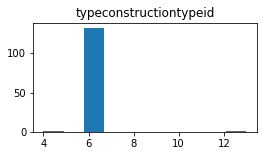

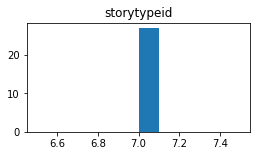

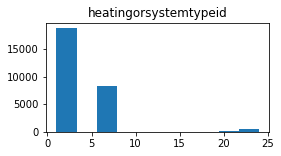

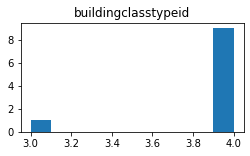

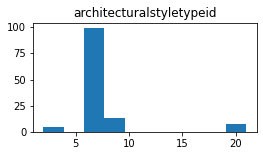

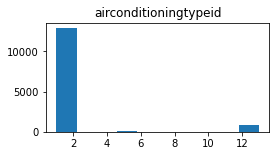

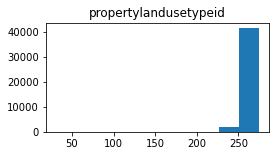

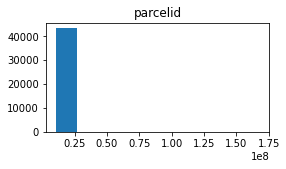

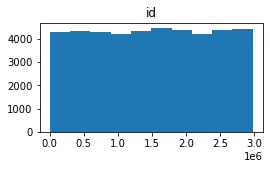

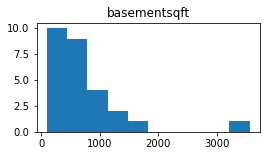

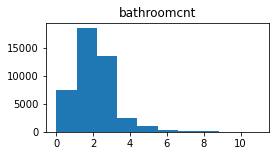

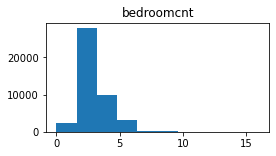

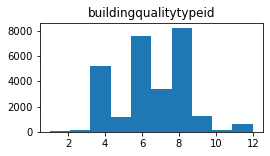

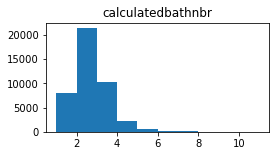

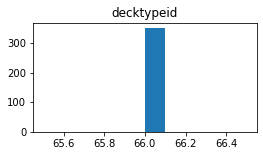

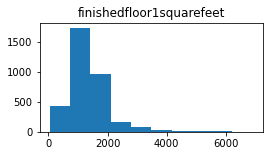

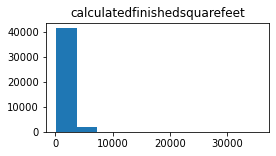

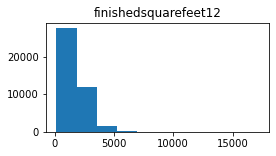

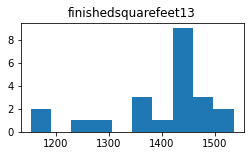

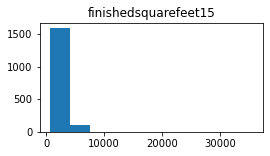

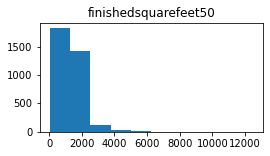

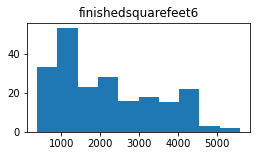

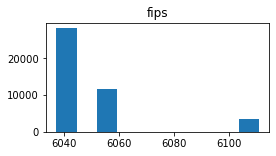

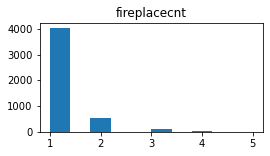

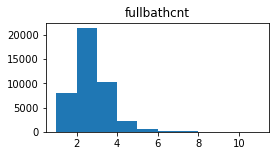

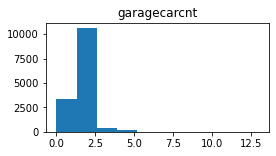

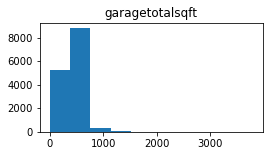

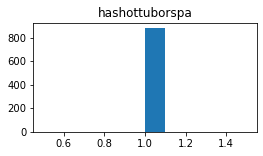

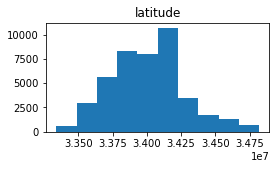

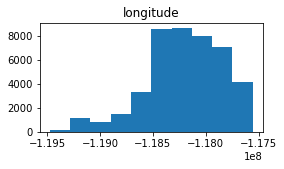

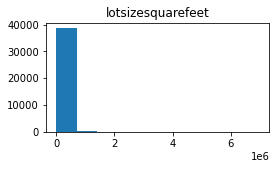

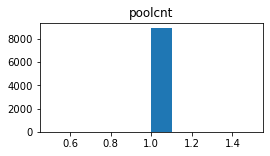

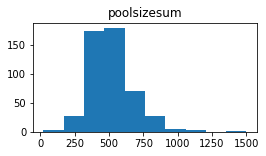

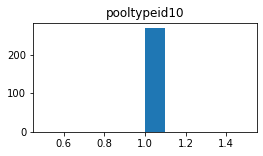

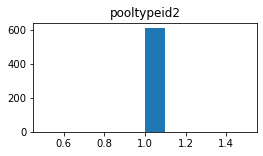

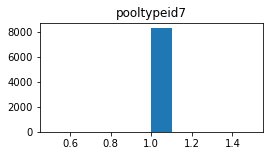

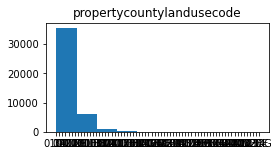

TypeError: 'value' must be an instance of str or bytes, not a float

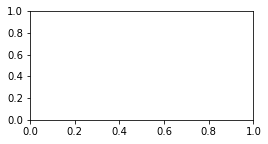

In [41]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [53]:
train.shape

(27064, 30)

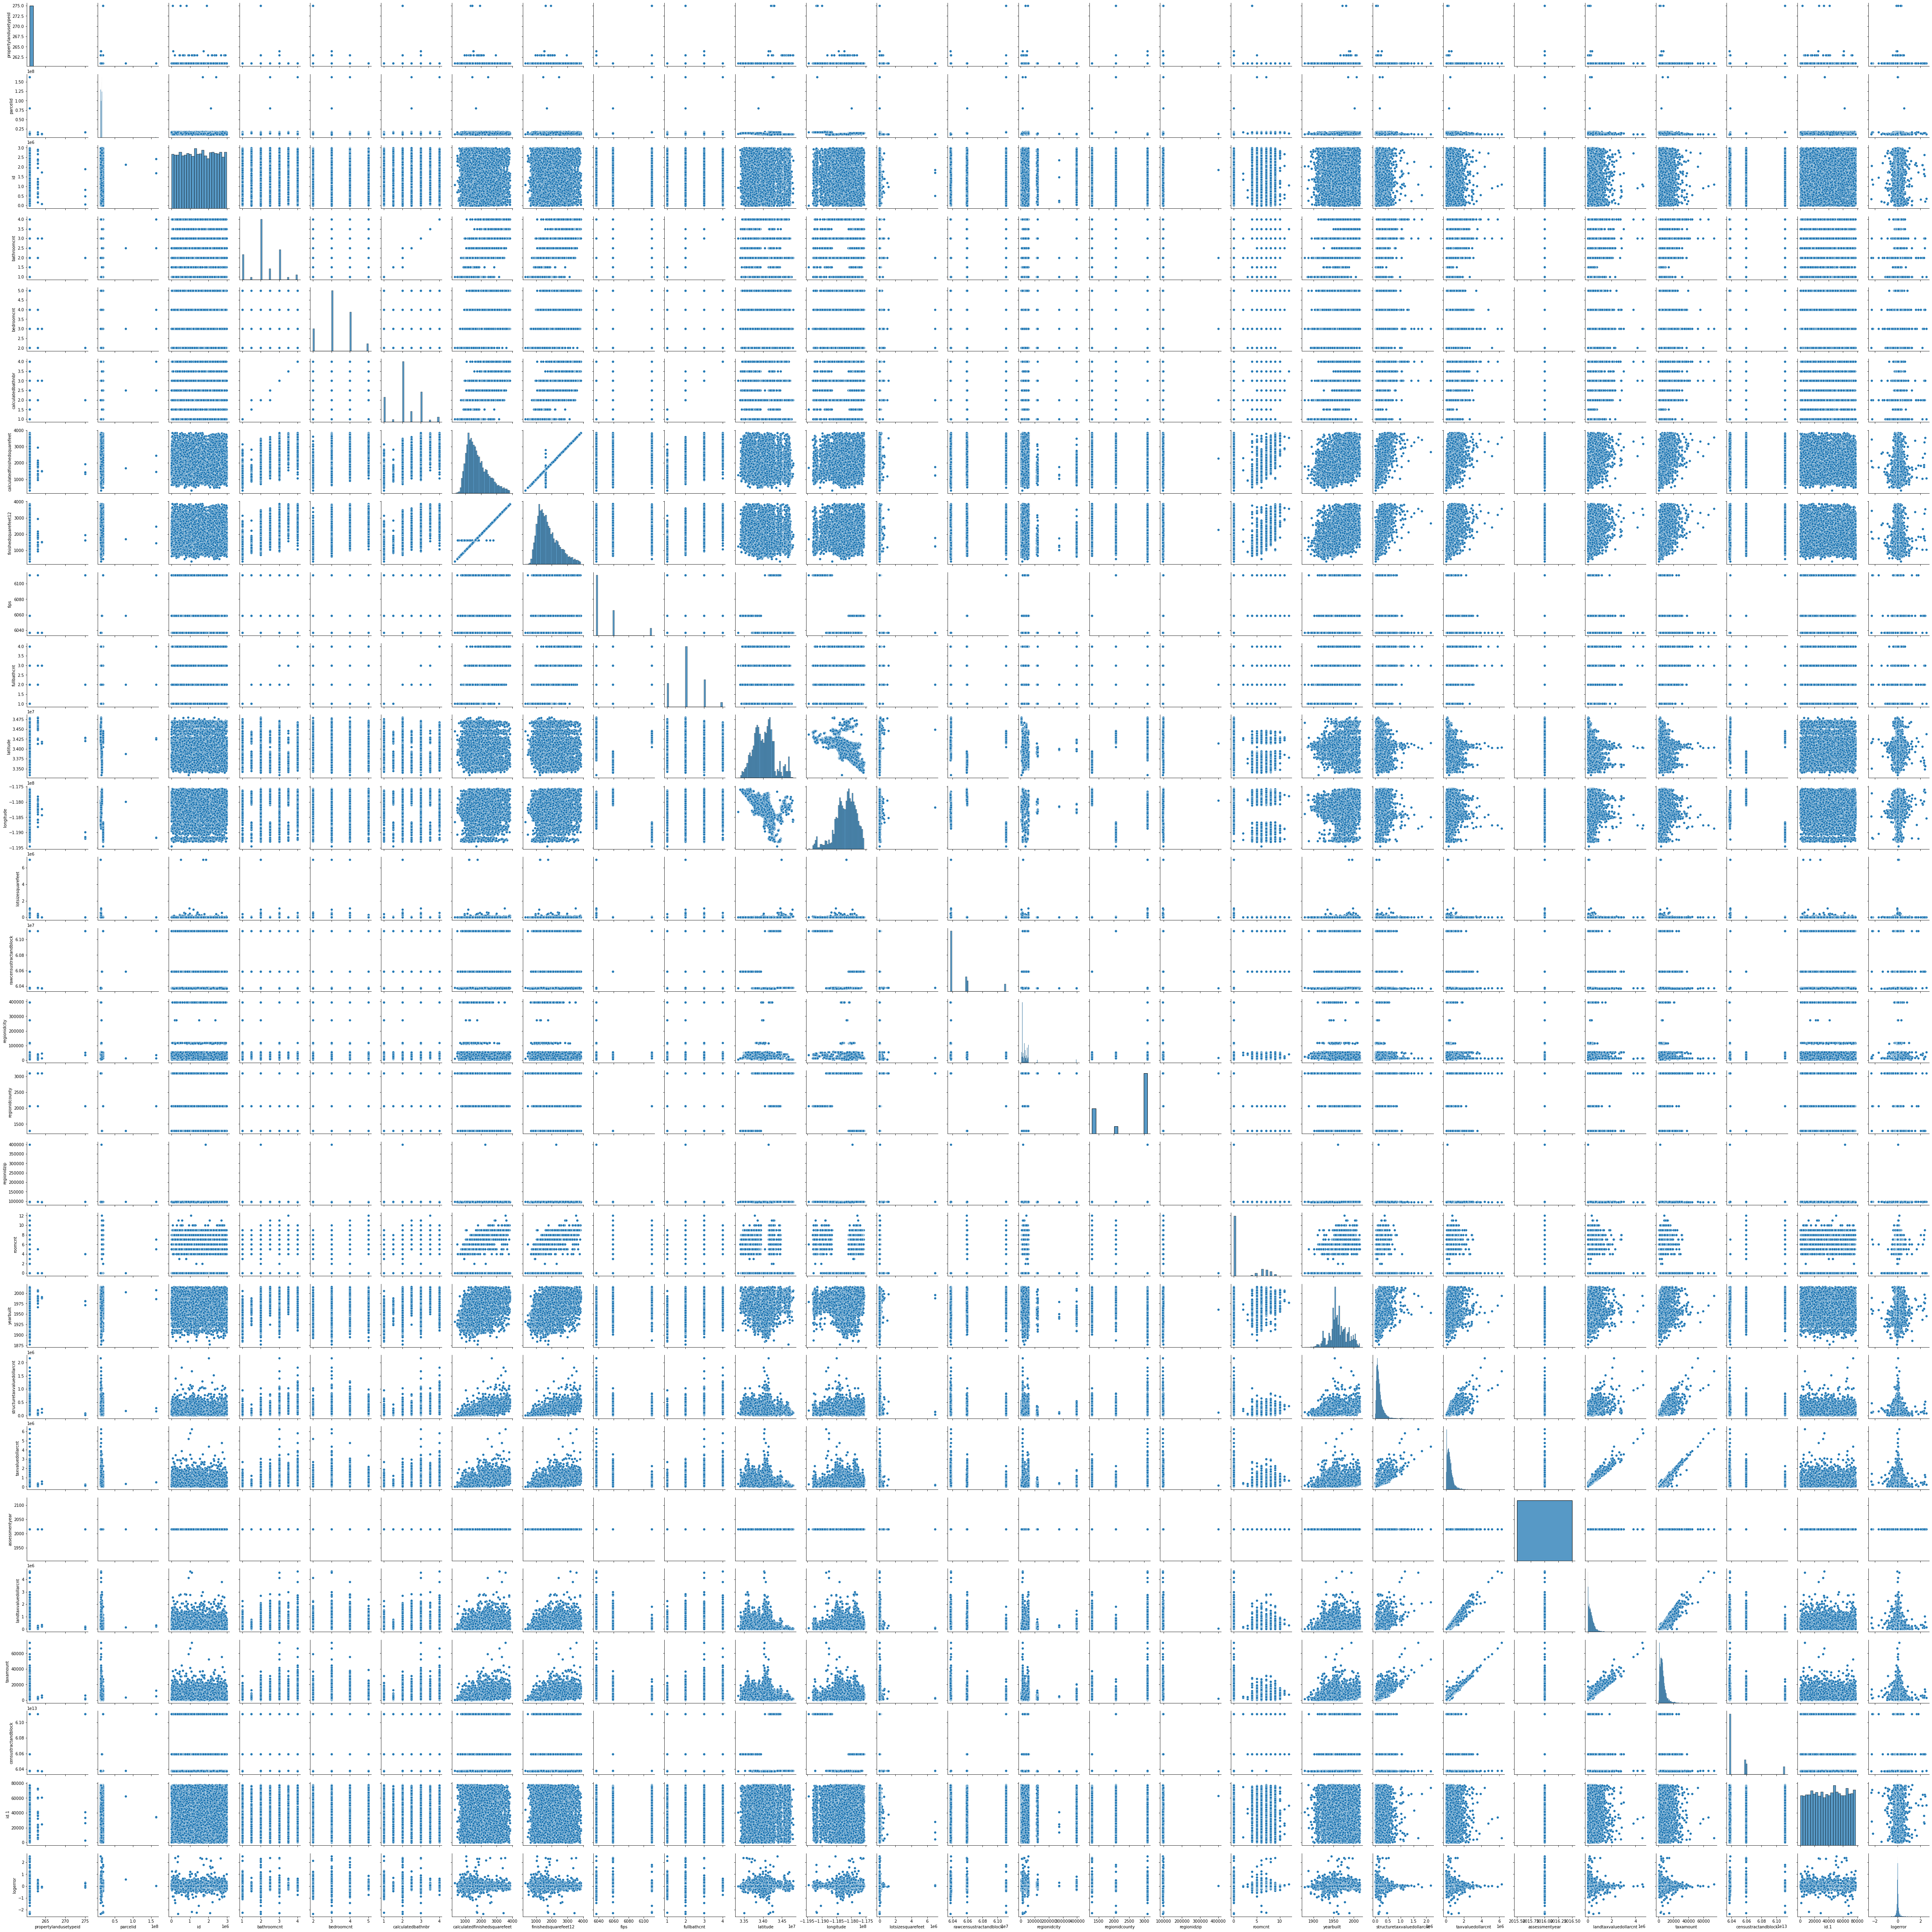

In [58]:
sns.pairplot(train.sample(10000))
plt.show()